In [38]:
import pandas as pd
import arrow

import numpy as np
import matplotlib.pyplot as plt

publicbody = pd.read_csv("publicbody.csv", index_col="id")
requests = pd.read_csv("requests.csv", index_col="id", low_memory=False)

In [39]:
# filter only w status "resolved"
resolved_reqs = requests[requests.status == "resolved"]
resolved_reqs.head() # von 96.000 sind 28.000 resolved

,slug,costs,description,due_date,first_message,last_message,public,public_body,reference,refusal_reason,resolution,resolved_on,same_as,status,url,public_body_id,public_body_slug
id,,,,,,,,,,,,,,,,,
62938,unveroffentlichte-wissenschaftliche-studien,0.0,eine Liste aller seit Anfang 2014 von Ihrem Mi...,2019-04-30T00:00:00+02:00,2019-03-26T17:59:33.795003+01:00,2019-05-03T17:30:48.831130+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,successful,NaN,NaN,resolved,/anfrage/unveroffentlichte-wissenschaftliche-s...,94,bundesministerium-fur-verkehr-bau-und-stadtent...
57350,abitur-aufgaben-im-fach-mathematik-im-jahr-201...,0.0,"Die Aufgaben, Erwartungshorizonte und Lösungen...",2019-04-16T00:00:00+02:00,2019-02-12T09:13:01.474823+01:00,2019-05-03T17:21:07.129969+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,exam:19:1:2013,NaN,user_withdrew_costs,NaN,NaN,resolved,/anfrage/abitur-aufgaben-im-fach-mathematik-im...,14737,ministerium-fur-bildung-sachsen-anhalt
127451,rechtmaigung-von-abstimmungen-in-der-kommune-u...,0.0,In Cottbus wurde der Oberbürgermeister per Bes...,2019-05-10T00:00:00+02:00,2019-04-07T16:08:47.022494+02:00,2019-05-03T15:50:28+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,successful,NaN,NaN,resolved,/anfrage/rechtmaigung-von-abstimmungen-in-der-...,3736,ministerium-des-innern
60433,thematisierung-der-bewegung-fridays-for-future,0.0,Antrag nach dem IFG/UIG/VIG\r\r\n\r\r\nSehr ge...,2019-04-09T00:00:00+02:00,2019-03-07T11:57:59.940364+01:00,2019-05-03T15:29:40.197842+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,successful,NaN,NaN,resolved,/anfrage/thematisierung-der-bewegung-fridays-f...,93,bundesministerium-fur-umwelt-naturschutz-und-r...
130512,qualitat-des-neckars,0.0,mich würde interessieren warum die Qualität vo...,2019-05-11T18:18:29.349111+02:00,2019-04-11T18:18:29.332433+02:00,2019-05-03T15:19:00+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,successful,NaN,NaN,resolved,/anfrage/qualitat-des-neckars/,935,wasser-und-schifffahrtsamt-stuttgart


In [40]:
# how to deal with date format
first = resolved_reqs.at[62938, "first_message"][:10]
last = resolved_reqs.at[62938, "last_message"][:10]

print(first)
print(last)

2019-03-26
2019-05-03


In [41]:
# how to get number of days between two dates
a = arrow.get(first)
b = arrow.get(last)

delta = (b-a)
print(delta)
print(delta.days) # int

38 days, 0:00:00
38


In [42]:
# format_date function

def format_date(date):
    date = date[:10]
    return arrow.get(date)

a = format_date("2019-03-26T17:59:33.795003+01:00")
b = format_date("2020-03-26T17:59:33.795003+01:00")

(b-a).days

366

In [70]:
newcol = []

for index, row in resolved_reqs.iterrows():
    
    day_last = format_date(row['last_message'])
    day_first = format_date(row['first_message'])
    
    days = (day_last - day_first).days
    
    newcol.append(abs(days))

In [71]:
resolved_reqs["days_until_resolved"] = newcol

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
resolved_reqs.sort_values("days_until_resolved", ascending=False).head()

,slug,costs,description,due_date,first_message,last_message,public,public_body,reference,refusal_reason,resolution,resolved_on,same_as,status,url,public_body_id,public_body_slug,days_until_resolved
id,,,,,,,,,,,,,,,,,,
3087,uberlange-verfahrensdauer-in-sozialrechtlichen...,0.0,Das neue Gesetz zum Rechtsschutz bei überlange...,2013-02-07T00:00:00+01:00,2013-01-07T00:38:31.133432+01:00,2018-08-19T06:58:08+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,refused,NaN,NaN,resolved,/anfrage/uberlange-verfahrensdauer-in-sozialre...,3096,sozialgericht-dortmund,2050
782,gutachten-rechtsfragen-im-kontext-der-abgeordn...,0.0,"Ich bitte um Übersendung des Gutachtens ""Recht...",2012-03-24T00:00:00+01:00,2012-02-21T19:42:00+01:00,2017-01-25T15:13:00+01:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,successful,NaN,https://fragdenstaat.de/api/v1/request/393/,resolved,/anfrage/gutachten-rechtsfragen-im-kontext-der...,351,deutscher-bundestag,1800
7551,angebot-geschz-559-elaman-gmbh,30.0,Das Angebot (Geschäftszeichen 559) der Firma E...,2014-10-21T00:00:00+02:00,2014-09-18T17:07:23.319038+02:00,2019-04-26T12:37:54.752215+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,§ 3.4: die Information einer durch Rechtsvorsc...,refused,NaN,NaN,resolved,/anfrage/angebot-geschz-559-elaman-gmbh/,246,beschaffungsamt-des-bundesministeriums-des-innern,1681
7552,angebot-geschz-559-elaman-gmbh-1,0.0,Das Angebot (Geschäftszeichen 559) der Firma E...,2015-02-24T00:00:00+01:00,2014-09-18T17:07:27.395005+02:00,2019-04-18T12:34:47.401200+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,§ 3.4: die Information einer durch Rechtsvorsc...,refused,NaN,NaN,resolved,/anfrage/angebot-geschz-559-elaman-gmbh-1/,82,bundeskriminalamt,1673
4081,wie-hoch-ist-der-anteil-der-aufstockern-unter-...,0.0,Nach Medienberichten vom 15.04.2013 ist bereit...,2013-05-28T00:00:00+02:00,2013-04-26T13:23:51.872579+02:00,2017-10-27T00:00:00+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,not_held,NaN,NaN,resolved,/anfrage/wie-hoch-ist-der-anteil-der-aufstocke...,88,bundesministerium-fur-arbeit-und-soziales,1645


<function matplotlib.pyplot.show(*args, **kw)>

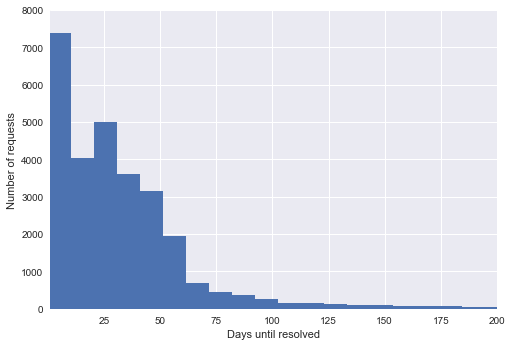

In [79]:
plt.style.use('seaborn')
plt.hist(newcol, 200)
plt.axis([1, 200, 0, 8000])
plt.xlabel("Days until resolved")
plt.ylabel("Number of requests")
plt.show

In [109]:
resolved_reqs.sort_values("days_until_resolved", ascending=True).head()

,slug,costs,description,due_date,first_message,last_message,public,public_body,reference,refusal_reason,resolution,resolved_on,same_as,status,url,public_body_id,public_body_slug,days_until_resolved
id,,,,,,,,,,,,,,,,,,
10290,solar-radiation-management-1,0.0,Für die Charta von Brüssel und weitere Verfolg...,2015-07-28T00:00:00+02:00,2015-06-24T17:52:22.222585+02:00,2015-06-24T18:01:10+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,user_withdrew,NaN,NaN,resolved,/anfrage/solar-radiation-management-1/,648,koordinator-der-bundesregierung-fur-luft-und-r...,0
59916,test,0.0,Yes,2019-04-06T00:00:00+02:00,2019-03-02T20:53:36.569875+01:00,2019-03-02T20:53:36.569875+01:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,NaN,NaN,user_withdrew,NaN,NaN,resolved,/anfrage/test/,7681,testbehorde,0
55967,kontrollbericht-zu-vollwertrestaurant-iden-sb-...,0.0,1. Wann haben die beiden letzten lebensmittelr...,2019-04-09T00:00:00+02:00,2019-02-06T12:53:59.318990+01:00,2019-02-06T13:51:34+01:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,food:custom:fb1c20ae-27e7-468e-a7c1-4b0acd705bdd,NaN,user_withdrew_costs,NaN,NaN,resolved,/anfrage/kontrollbericht-zu-vollwertrestaurant...,15443,landeshauptstadt-stuttgart-amt-fur-offentliche...,0
119273,kontrollbericht-zu-cafete-paderborn,0.0,1. Wann haben die beiden letzten lebensmittelr...,2019-05-07T00:00:00+02:00,2019-04-05T01:28:41.079817+02:00,2019-04-05T10:03:29+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,food:amenity:150071_2377765178,NaN,user_withdrew,NaN,NaN,resolved,/anfrage/kontrollbericht-zu-cafete-paderborn/,15569,kreis-paderborn-amt-fur-verbraucherschutz-und-...,0
119274,kontrollbericht-zu-restaurant-phonix-paderborn,0.0,1. Wann haben die beiden letzten lebensmittelr...,2019-05-07T00:00:00+02:00,2019-04-05T01:33:04.422472+02:00,2019-04-05T10:04:33+02:00,True,{'resource_uri': 'https://fragdenstaat.de/api/...,food:custom:97ffc676-1cdf-450e-a8ad-c1f0c3c33ba1,NaN,user_withdrew,NaN,NaN,resolved,/anfrage/kontrollbericht-zu-restaurant-phonix-...,15569,kreis-paderborn-amt-fur-verbraucherschutz-und-...,0


In [107]:
# when are successful requests resolved:
suc_reqs = resolved_reqs[resolved_reqs.resolution == "successful"]
# suc_reqs.sort_values("days_until_resolved", ascending=True).head()

<function matplotlib.pyplot.show(*args, **kw)>

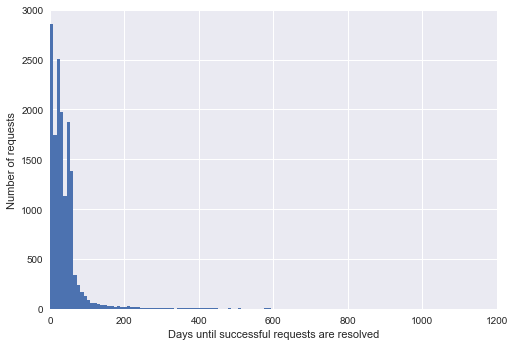

In [103]:
plt.style.use('seaborn')
plt.hist(suc_reqs["days_until_resolved"], 200)
plt.axis([1, 1200, 0, 3000])
plt.xlabel("Days until successful requests are resolved")
plt.ylabel("Number of requests")
plt.show

In [110]:
# when are unsuccessful requests resolved:

unsuc_reqs = resolved_reqs[resolved_reqs.resolution == "refused"]
#unsuc_reqs.sort_values("days_until_resolved", ascending=False).head()

<function matplotlib.pyplot.show(*args, **kw)>

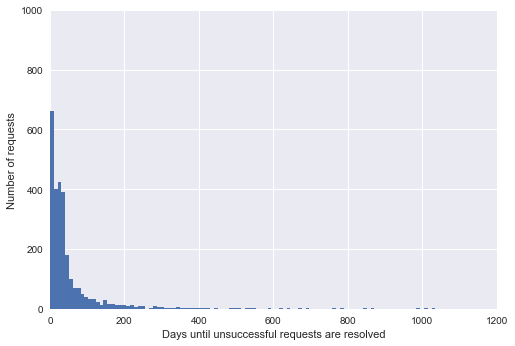

In [95]:
plt.style.use('seaborn')
plt.hist(unsuc_reqs["days_until_resolved"], 200)
plt.axis([1, 1200, 0, 1000])
plt.xlabel("Days until unsuccessful requests are resolved")
plt.ylabel("Number of requests")
plt.show

# any change over the years?

In [106]:
# calculate average number of days. first_message in 2013-2018
rheinland-pfalz: vor und nach gesetzesänderung

# FRAGEN
- sinkt die wahrscheinlichkeit, dass anfrage successful ist, wenn es länger dauert?